# British Birdsong Dataset - Exploration
## Audio Analysis and Visualization

This notebook explores the British Birdsong Dataset for classification and analysis.

In [1]:
import os
from pathlib import Path

print("Current working directory:", os.getcwd())
print("\nLet's check what's around us:")
print("Parent directory contents:", list(Path('..').iterdir()))

Current working directory: C:\Users\vikramv\Downloads\ForComputationalBiology\notebooks

Let's check what's around us:
Parent directory contents: [WindowsPath('../birdsong_metadata.csv'), WindowsPath('../data'), WindowsPath('../files.zip'), WindowsPath('../notebooks'), WindowsPath('../outputs'), WindowsPath('../QUICKSTART.md'), WindowsPath('../README.md'), WindowsPath('../requirements.txt'), WindowsPath('../ROADMAP.md'), WindowsPath('../songs'), WindowsPath('../src')]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from pathlib import Path
import os

# Set style
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)

print('Libraries loaded successfully!')

Libraries loaded successfully!


## 1. Load and Inspect Dataset Structure

In [3]:
# Set data path
DATA_PATH = Path('../data/birdsong')

# List all audio files
audio_files = list(DATA_PATH.rglob('*.wav')) + list(DATA_PATH.rglob('*.mp3'))
print(f'Total audio files found: {len(audio_files)}')

# Display first few files
for i, file in enumerate(audio_files[:5]):
    print(f'{i+1}. {file.name}')

Total audio files found: 0


## 2. Analyze Dataset Distribution

In [4]:
# Set data path
DATA_PATH = Path('../songs/songs')

# List all audio files - INCLUDING .flac files!
audio_files = list(DATA_PATH.rglob('*.wav')) + list(DATA_PATH.rglob('*.mp3')) + list(DATA_PATH.rglob('*.flac'))
print(f'Total audio files found: {len(audio_files)}')

# Display first few files
for i, file in enumerate(audio_files[:5]):
    print(f'{i+1}. {file.name}')

Total audio files found: 264
1. xc101371.flac
2. xc101377.flac
3. xc101862.flac
4. xc101932.flac
5. xc101933.flac


In [5]:
# Extract species names from file structure
species_data = []

for file in audio_files:
    # Get the parent directory name as species
    # The files are directly in songs/songs/, so parent.name gives species
    species = file.parent.name
    species_data.append({
        'filepath': str(file),
        'filename': file.name,
        'species': species
    })

df = pd.DataFrame(species_data)
print(f'\nDataset shape: {df.shape}')
print(f'Number of species: {df["species"].nunique()}')
print('\nSpecies distribution:')
print(df['species'].value_counts())


Dataset shape: (264, 3)
Number of species: 1

Species distribution:
species
songs    264
Name: count, dtype: int64


In [6]:
# Let's see the actual structure
print("Sample file paths:")
for file in audio_files[:5]:
    print(f"File: {file.name}")
    print(f"  Parent: {file.parent}")
    print(f"  Parent name: {file.parent.name}")
    print()

Sample file paths:
File: xc101371.flac
  Parent: ..\songs\songs
  Parent name: songs

File: xc101377.flac
  Parent: ..\songs\songs
  Parent name: songs

File: xc101862.flac
  Parent: ..\songs\songs
  Parent name: songs

File: xc101932.flac
  Parent: ..\songs\songs
  Parent name: songs

File: xc101933.flac
  Parent: ..\songs\songs
  Parent name: songs



In [7]:
# Load the metadata CSV to get species information
metadata = pd.read_csv('../birdsong_metadata.csv')
print("Metadata columns:", metadata.columns.tolist())
print("\nFirst few rows:")
print(metadata.head())

Metadata columns: ['file_id', 'genus', 'species', 'english_cname', 'who_provided_recording', 'country', 'latitude', 'longitute', 'type', 'license']

First few rows:
   file_id         genus    species   english_cname who_provided_recording  \
0   132608      Acanthis    flammea  Common Redpoll         Jarek Matusiak   
1   132611      Acanthis    flammea  Common Redpoll         Jarek Matusiak   
2    35068      Acanthis    flammea  Common Redpoll             Sander Bot   
3    82715  Acrocephalus  palustris   Marsh Warbler         Dougie Preston   
4    64685  Acrocephalus  palustris   Marsh Warbler         Dougie Preston   

          country  latitude  longitute                     type  \
0          Poland   50.7932    15.4995       female, male, song   
1          Poland   50.7932    15.4995  flight call, male, song   
2     Netherlands   52.8176     6.4326               call, song   
3  United Kingdom   60.3539    -1.2689                     Song   
4  United Kingdom   60.3539    

In [8]:
# Extract file IDs from audio filenames and merge with metadata
import re

# Extract file_id from each audio filename
for i, row in enumerate(species_data):
    # Extract the number from filename like "xc101371.flac"
    filename = row['filename']
    file_id = re.search(r'xc(\d+)', filename.lower())
    if file_id:
        species_data[i]['file_id'] = int(file_id.group(1))

# Create dataframe and merge with metadata
df = pd.DataFrame(species_data)
df = df.merge(metadata[['file_id', 'english_cname', 'genus', 'species']], 
              on='file_id', how='left')

print(f'\nDataset shape: {df.shape}')
print(f'Number of species: {df["english_cname"].nunique()}')
print('\nSpecies distribution:')
print(df['english_cname'].value_counts())


Dataset shape: (264, 7)
Number of species: 88

Species distribution:
english_cname
Long-tailed Tit           3
Eurasian Golden Oriole    3
Wood Warbler              3
Lesser Whitethroat        3
Common Starling           3
                         ..
Common Redstart           3
Stock Dove                3
Red Crossbill             3
Eurasian Blackcap         3
Carrion Crow              3
Name: count, Length: 88, dtype: int64


In [9]:
# Load the metadata CSV to get species information
metadata = pd.read_csv('../birdsong_metadata.csv')
print("Metadata columns:", metadata.columns.tolist())
print("\nFirst few rows:")
print(metadata.head())

Metadata columns: ['file_id', 'genus', 'species', 'english_cname', 'who_provided_recording', 'country', 'latitude', 'longitute', 'type', 'license']

First few rows:
   file_id         genus    species   english_cname who_provided_recording  \
0   132608      Acanthis    flammea  Common Redpoll         Jarek Matusiak   
1   132611      Acanthis    flammea  Common Redpoll         Jarek Matusiak   
2    35068      Acanthis    flammea  Common Redpoll             Sander Bot   
3    82715  Acrocephalus  palustris   Marsh Warbler         Dougie Preston   
4    64685  Acrocephalus  palustris   Marsh Warbler         Dougie Preston   

          country  latitude  longitute                     type  \
0          Poland   50.7932    15.4995       female, male, song   
1          Poland   50.7932    15.4995  flight call, male, song   
2     Netherlands   52.8176     6.4326               call, song   
3  United Kingdom   60.3539    -1.2689                     Song   
4  United Kingdom   60.3539    

In [10]:
# Extract file IDs from audio filenames (remove .flac extension)
species_data = []

for file in audio_files:
    # Get file_id by removing the .flac extension and 'xc' prefix
    file_id_str = file.stem  # e.g., 'xc101371'
    # Remove 'xc' prefix and convert to int
    file_id = int(file_id_str.replace('xc', ''))
    species_data.append({
        'file_id': file_id,
        'filepath': str(file),
        'filename': file.name
    })

# Create dataframe from audio files
audio_df = pd.DataFrame(species_data)

# Merge with metadata to get species information
df = audio_df.merge(metadata, on='file_id', how='left')

print(f'\nDataset shape: {df.shape}')
print(f'Number of species: {df["species"].nunique()}')
print('\nSpecies distribution:')
print(df['species'].value_counts())


Dataset shape: (264, 12)
Number of species: 85

Species distribution:
species
major          6
montanus       6
palustris      6
caudatus       3
oriolus        3
              ..
phoenicurus    3
oenas          3
curvirostra    3
atricapilla    3
corone         3
Name: count, Length: 85, dtype: int64


In [11]:
# Check what columns we have
print("Columns in df:", df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

Columns in df: ['file_id', 'filepath', 'filename', 'genus', 'species', 'english_cname', 'who_provided_recording', 'country', 'latitude', 'longitute', 'type', 'license']

First few rows:
   file_id                      filepath       filename         genus  \
0   101371  ..\songs\songs\xc101371.flac  xc101371.flac    Aegithalos   
1   101377  ..\songs\songs\xc101377.flac  xc101377.flac       Oriolus   
2   101862  ..\songs\songs\xc101862.flac  xc101862.flac  Phylloscopus   
3   101932  ..\songs\songs\xc101932.flac  xc101932.flac        Sylvia   
4   101933  ..\songs\songs\xc101933.flac  xc101933.flac        Sylvia   

      species           english_cname who_provided_recording         country  \
0    caudatus         Long-tailed Tit     Krzysiek Deoniziak          Poland   
1     oriolus  Eurasian Golden Oriole     Krzysiek Deoniziak          Poland   
2  sibilatrix            Wood Warbler           Richard Dunn  United Kingdom   
3     curruca      Lesser Whitethroat           Richard

## 3. Audio Feature Analysis

In [12]:
# Load and analyze sample audio files
def analyze_audio_file(filepath):
    """Load audio and extract basic properties"""
    y, sr = librosa.load(filepath, sr=None)
    duration = librosa.get_duration(y=y, sr=sr)
    
    return {
        'duration': duration,
        'sample_rate': sr,
        'num_samples': len(y)
    }

# Analyze first 50 files for speed
audio_properties = []
for file in audio_files[:50]:
    try:
        props = analyze_audio_file(file)
        props['filepath'] = str(file)
        audio_properties.append(props)
    except Exception as e:
        print(f'Error loading {file.name}: {e}')

props_df = pd.DataFrame(audio_properties)
print('\nAudio Properties Summary:')
print(props_df.describe())


Audio Properties Summary:
         duration  sample_rate   num_samples
count   50.000000         50.0  5.000000e+01
mean    90.851260      44100.0  4.006541e+06
std     87.990538          0.0  3.880383e+06
min      4.775782      44100.0  2.106120e+05
25%     25.727789      44100.0  1.134596e+06
50%     52.781327      44100.0  2.327656e+06
75%    106.151020      44100.0  4.681260e+06
max    252.179751      44100.0  1.112113e+07


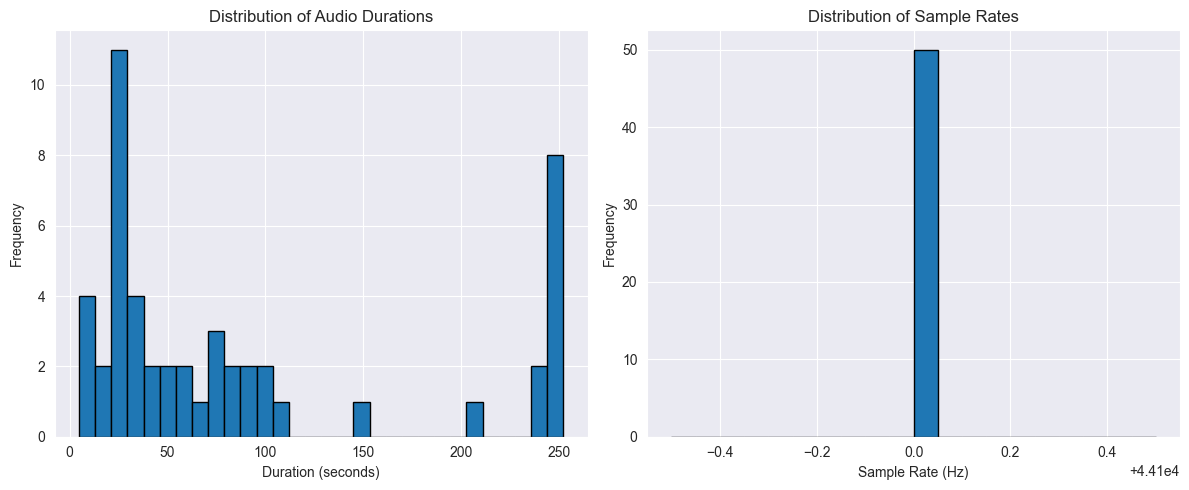

In [13]:
# Visualize duration distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(props_df['duration'], bins=30, edgecolor='black')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Audio Durations')

plt.subplot(1, 2, 2)
plt.hist(props_df['sample_rate'], bins=20, edgecolor='black')
plt.xlabel('Sample Rate (Hz)')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Rates')

plt.tight_layout()
plt.show()

## 4. Visualize Sample Bird Songs

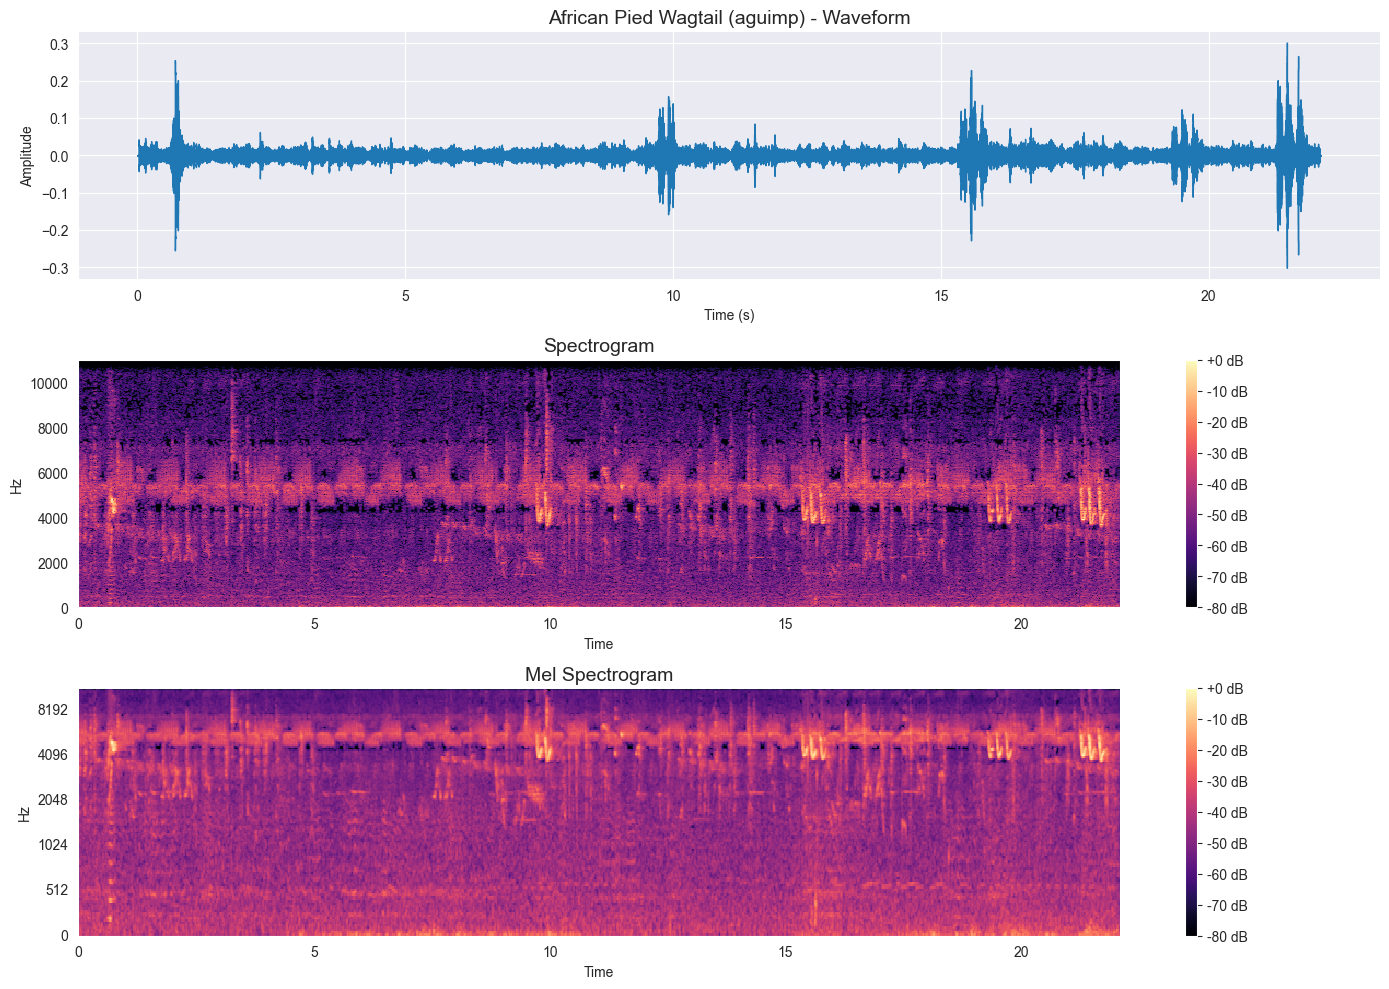

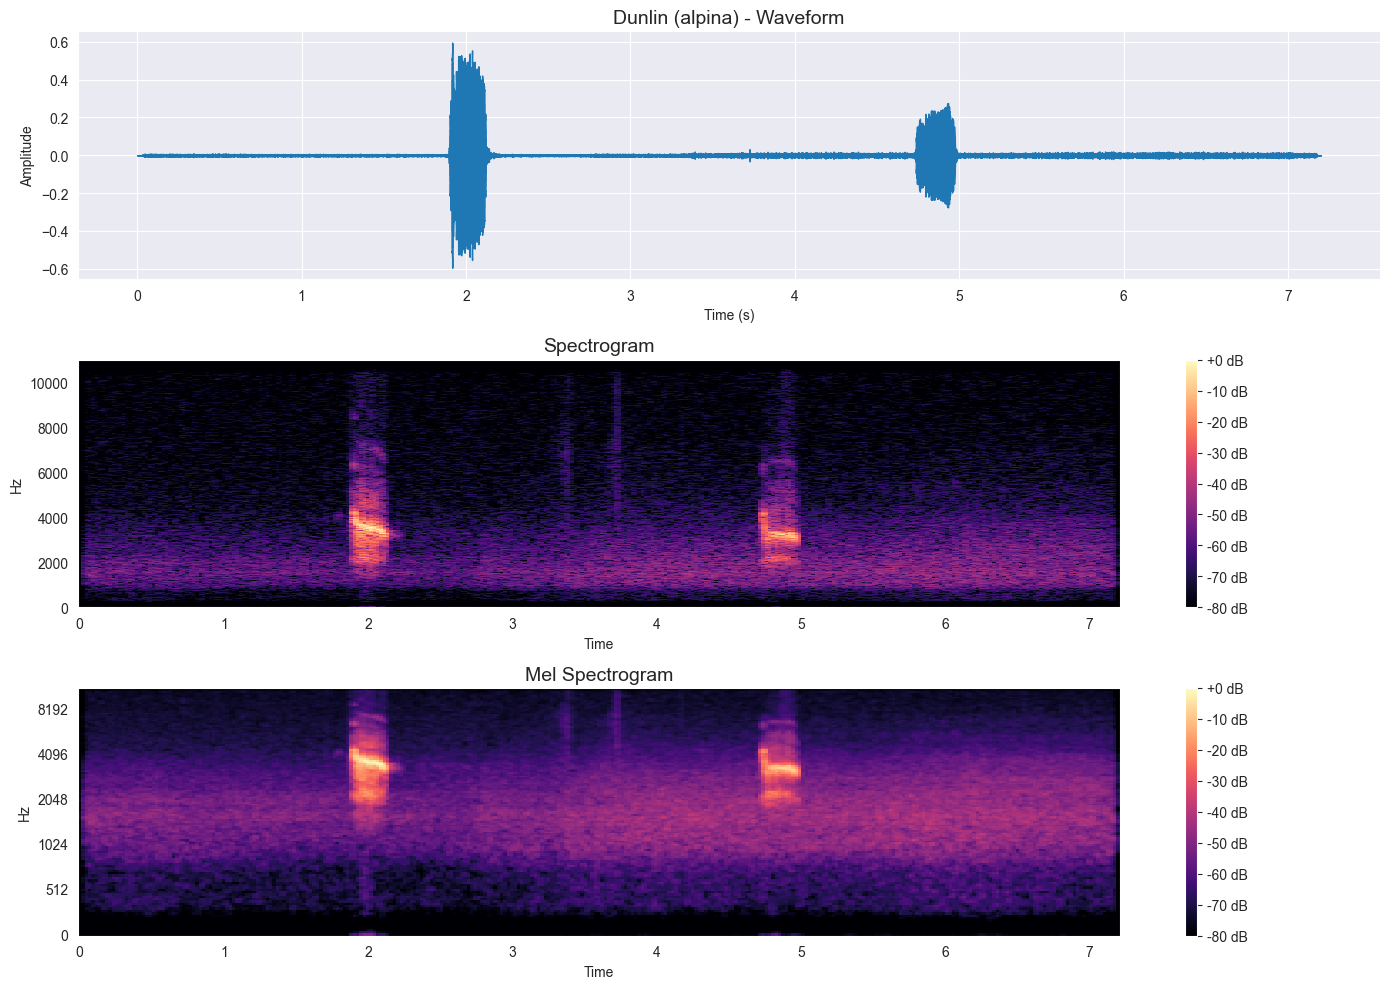

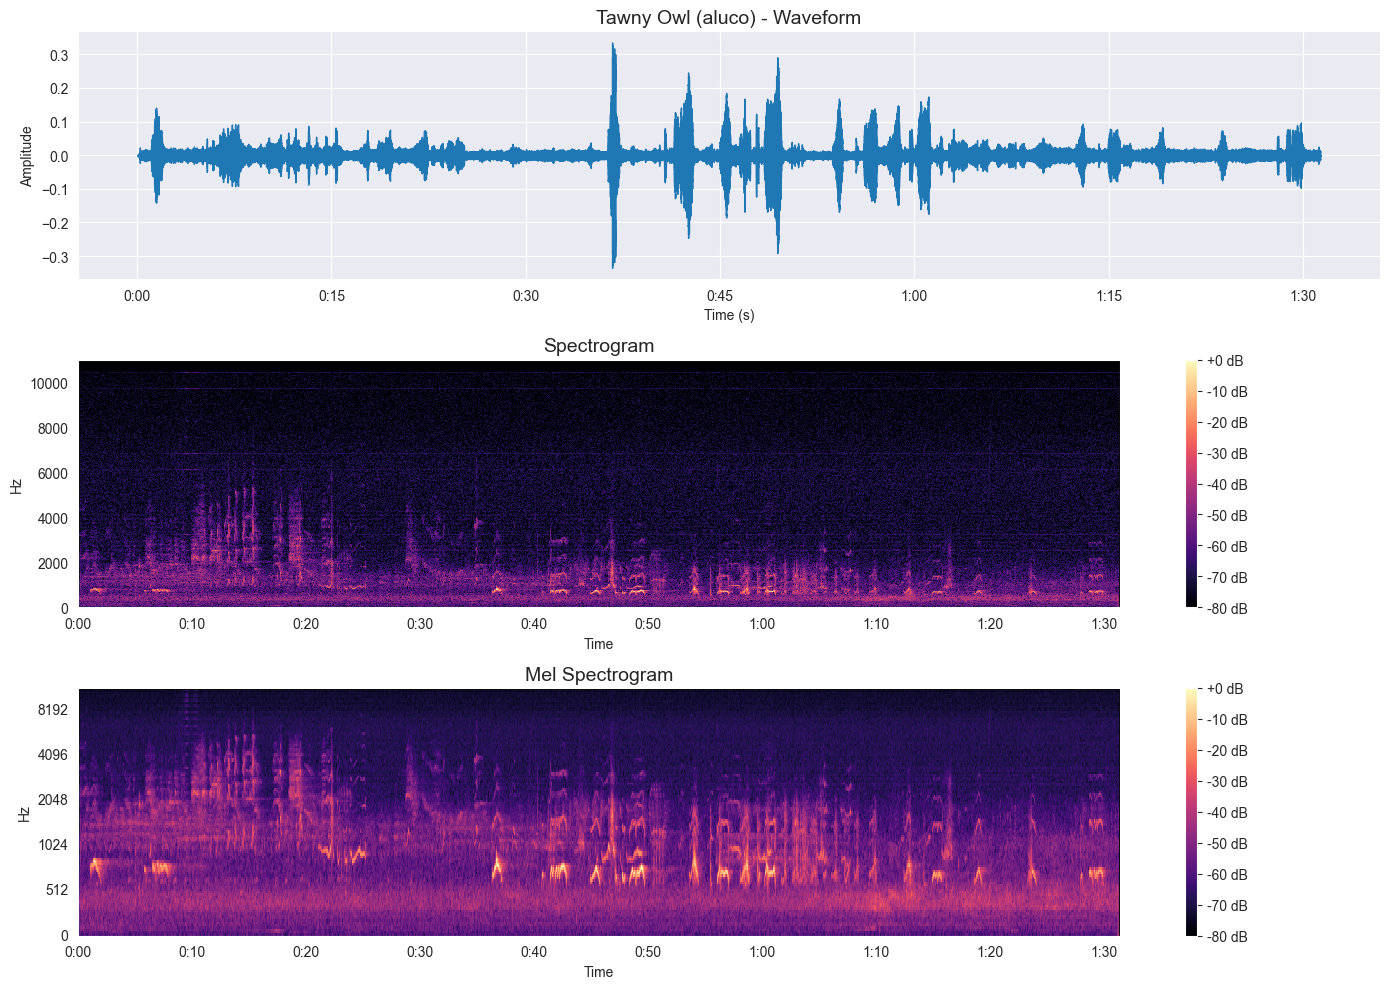

In [14]:
def visualize_birdsong(filepath, species_name):
    """Create comprehensive visualization of a bird song"""
    # Load audio
    y, sr = librosa.load(filepath, sr=22050)
    
    # Create figure with subplots
    fig, axes = plt.subplots(3, 1, figsize=(14, 10))
    
    # 1. Waveform
    librosa.display.waveshow(y, sr=sr, ax=axes[0])
    axes[0].set_title(f'{species_name} - Waveform', fontsize=14)
    axes[0].set_xlabel('Time (s)')
    axes[0].set_ylabel('Amplitude')
    
    # 2. Spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    img = librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='hz', ax=axes[1])
    axes[1].set_title('Spectrogram', fontsize=14)
    fig.colorbar(img, ax=axes[1], format='%+2.0f dB')
    
    # 3. Mel Spectrogram
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    img2 = librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel', ax=axes[2])
    axes[2].set_title('Mel Spectrogram', fontsize=14)
    fig.colorbar(img2, ax=axes[2], format='%+2.0f dB')
    
    plt.tight_layout()
    return fig

# Visualize samples from different species
# Get 3 random samples from different species
sample_df = df.groupby('species').first().head(3).reset_index()

for idx, row in sample_df.iterrows():
    try:
        species_name = f"{row['english_cname']} ({row['species']})"
        visualize_birdsong(row['filepath'], species_name)
        plt.show()
    except Exception as e:
        print(f"Error visualizing {row['english_cname']}: {e}")

In [15]:
# Check what columns we have
print("Columns in df:", df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

Columns in df: ['file_id', 'filepath', 'filename', 'genus', 'species', 'english_cname', 'who_provided_recording', 'country', 'latitude', 'longitute', 'type', 'license']

First few rows:
   file_id                      filepath       filename         genus  \
0   101371  ..\songs\songs\xc101371.flac  xc101371.flac    Aegithalos   
1   101377  ..\songs\songs\xc101377.flac  xc101377.flac       Oriolus   
2   101862  ..\songs\songs\xc101862.flac  xc101862.flac  Phylloscopus   
3   101932  ..\songs\songs\xc101932.flac  xc101932.flac        Sylvia   
4   101933  ..\songs\songs\xc101933.flac  xc101933.flac        Sylvia   

      species           english_cname who_provided_recording         country  \
0    caudatus         Long-tailed Tit     Krzysiek Deoniziak          Poland   
1     oriolus  Eurasian Golden Oriole     Krzysiek Deoniziak          Poland   
2  sibilatrix            Wood Warbler           Richard Dunn  United Kingdom   
3     curruca      Lesser Whitethroat           Richard

## 5. Extract Audio Features for Classification

In [16]:
def extract_features(filepath, sr=22050, n_mfcc=40):
    """Extract audio features for machine learning"""
    try:
        # Load audio
        y, sr = librosa.load(filepath, sr=sr, duration=30)
        
        # Extract features
        features = {}
        
        # MFCCs
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        features['mfcc_mean'] = np.mean(mfcc, axis=1)
        features['mfcc_std'] = np.std(mfcc, axis=1)
        
        # Spectral features
        features['spectral_centroid'] = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
        features['spectral_rolloff'] = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
        features['spectral_bandwidth'] = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
        
        # Zero crossing rate
        features['zcr'] = np.mean(librosa.feature.zero_crossing_rate(y))
        
        # Chroma features
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)
        features['chroma_mean'] = np.mean(chroma, axis=1)
        
        return features
    
    except Exception as e:
        print(f'Error extracting features: {e}')
        return None

# Extract features from sample files
print('Extracting features from sample files...')
sample_file = audio_files[0]
features = extract_features(sample_file)
if features:
    print(f'\nFeature keys: {list(features.keys())}')
    print(f'MFCC shape: {features["mfcc_mean"].shape}')

Extracting features from sample files...

Feature keys: ['mfcc_mean', 'mfcc_std', 'spectral_centroid', 'spectral_rolloff', 'spectral_bandwidth', 'zcr', 'chroma_mean']
MFCC shape: (40,)


## Next Steps

1. **Classification**: Build a model to classify bird species
2. **Segmentation**: Detect and segment individual bird calls
3. **Generation**: Generate synthetic bird songs using GANs or VAEs
4. **Advanced Analysis**: Apply topological data analysis or geometric deep learning